<a href="https://colab.research.google.com/github/czhan244/MAT421/blob/main/Module_B_1%262.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Charpter 17 

17.1 Linear Interpolation


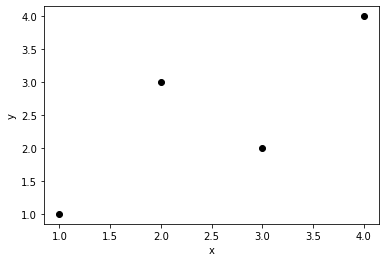

In [ ]:
from matplotlib import pyplot as plt
x = [1,2,3,4]
y = [1,3,2,4]
plt.plot(x,y,'ko') 
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<hr>
17.2 Linear Interpolation

 linear interpolation: The line connecting the closest points to the left and right is presumed to pass through the estimated location.

 let's assume that $x_i< x <x_{i+1}$, then $y^x=y_i+(y_{i+1}−y_i)*(x−x_i)/(x_{i+1}−x_i)$

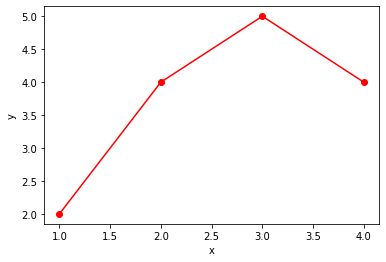

In [ ]:
from matplotlib import pyplot as plt
x = [1,2,3,4]
y = [2,4,5,4]
plt.plot(x,y,'-ro') 
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<hr>
17.3 Cubic Spline Interpolation

Cubic spline interpolation: A collection of piecewise cubic functions make up the interpolating function.

Assume that the points $(x_i,y_i)$ and $(x_{i+1},y_{i+1})$ are joined by a cubic polynomial $S_i(x)=a_ix^3+b_ix^2+c_ix+d_i$ that is valid for $x_i≤x≤x_{i+1}$ for i=1,…,n−1. 

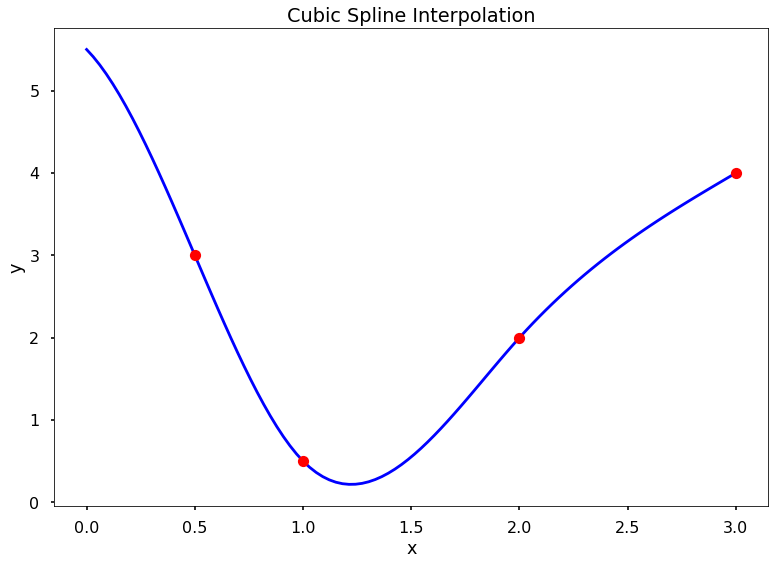

In [ ]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

x = [0.5, 1, 2, 3]
y = [3, 0.5, 2, 4]

f = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(0, 3, 100)
y_new = f(x_new)

plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<hr>

17.4 Lagrange Polynomial Interpolation

Lagrange polynomial interpolation discovers a single polynomial that passes through all of the data points rather than cubic polynomials between succeeding pairs of data points.

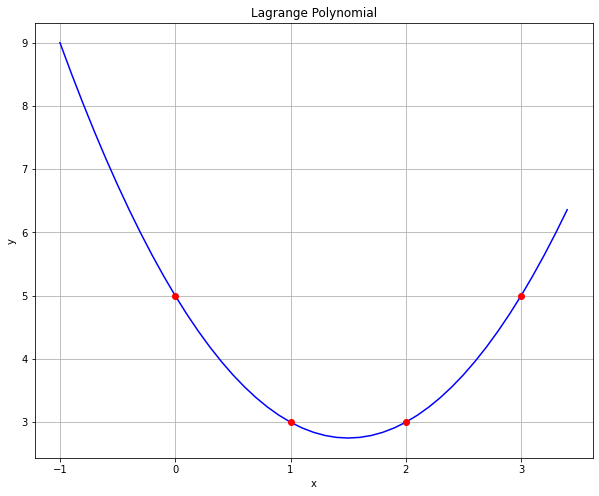

In [15]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

x = [0, 1, 2, 3]
y = [5, 3, 3, 5]
x_new = np.arange(-1, 3.5, 0.1)
f = lagrange(x, y) 
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<hr>


17.5 Newton's Polynomial Interpolation

Newton’s polynomial interpolation is another popular way to fit exactly for a set of data points.

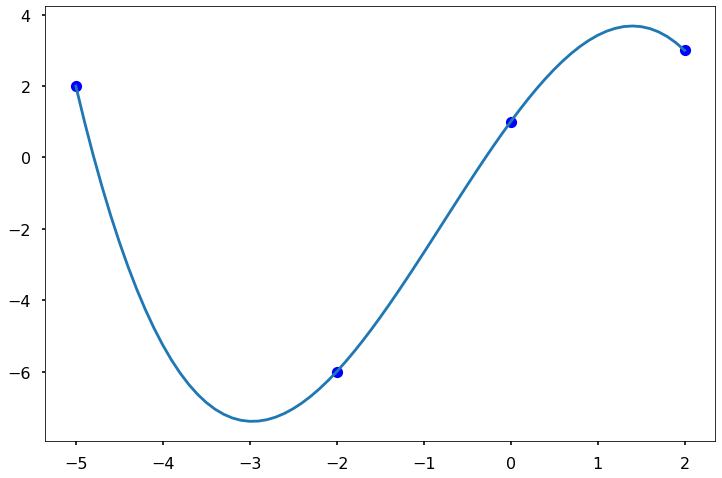

In [19]:
def divided_diff(x, y):

    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x): 
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

x = np.array([-5, -2, 0, 2])
y = np.array([2, -6, 1, 3])

a_s = divided_diff(x, y)[0, :]


x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)